# 1. KNN for classification and regression

a) Use KNN to classify iris dataset

In [370]:
from sklearn.datasets import load_iris
import pandas as pd

flowers = load_iris()
df_iris = pd.DataFrame(flowers["data"], columns=flowers.feature_names)
df_iris["class"] = flowers.target
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [371]:
q1 = df_iris["sepal width (cm)"].quantile(0.25)
q3 = df_iris["sepal width (cm)"].quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

df_no_outliers = df_iris[(df_iris["sepal width (cm)"] >= lower_bound) & (df_iris["sepal width (cm)"] <= upper_bound)]

## KNN with train|test split (leaks data)

In [372]:
X, y = df_no_outliers.drop("class", axis="columns"), df_no_outliers["class"]

In [373]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

X_train.shape, X_test.shape

((102, 4), (44, 4))

In [374]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

scaled_X_train.mean(), scaled_X_train.std(), scaled_X_test.mean(), scaled_X_test.std()

(np.float64(1.959217102279688e-16),
 np.float64(0.9999999999999998),
 np.float64(-0.022118526323493478),
 np.float64(1.0033998911421338))

In [375]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=1)
model.fit(scaled_X_train, y_train)

y_pred = model.predict(scaled_X_test)
y_pred

array([0, 2, 0, 0, 0, 2, 0, 1, 2, 0, 0, 1, 2, 1, 2, 0, 1, 2, 0, 1, 2, 2,
       0, 1, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 0, 0, 2, 1, 2, 2, 2, 2, 2, 0])

In [376]:
y_test.values

array([0, 2, 0, 0, 0, 2, 0, 1, 1, 0, 0, 2, 2, 1, 2, 0, 1, 2, 0, 1, 2, 2,
       0, 1, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 0, 0, 2, 1, 1, 1, 2, 2, 2, 0])

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.89      0.73      0.80        11
           2       0.83      0.94      0.88        16

    accuracy                           0.91        44
   macro avg       0.91      0.89      0.89        44
weighted avg       0.91      0.91      0.91        44



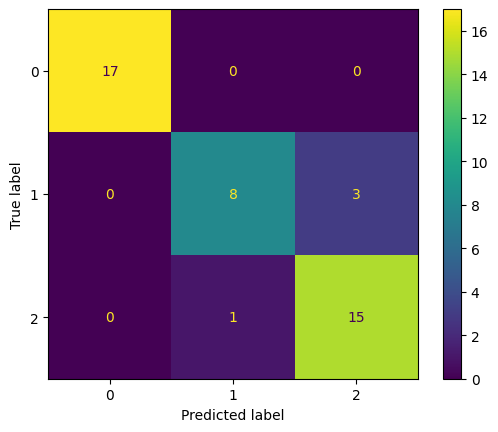

In [377]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score

print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot();

## KNN with train|val|test split

In [378]:
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42)

X_train.shape, X_test.shape

((102, 4), (22, 4))

In [379]:
scaler = StandardScaler()
scaler.fit(X_train)

scaled_X_train = scaler.transform(X_train)
scaled_X_val = scaler.transform(X_val)
scaled_X_test = scaler.transform(X_test)

scaled_X_train.mean(), scaled_X_train.std(), scaled_X_test.mean(), scaled_X_test.std()

(np.float64(1.959217102279688e-16),
 np.float64(0.9999999999999998),
 np.float64(-0.08280047634594966),
 np.float64(0.9751605413472768))

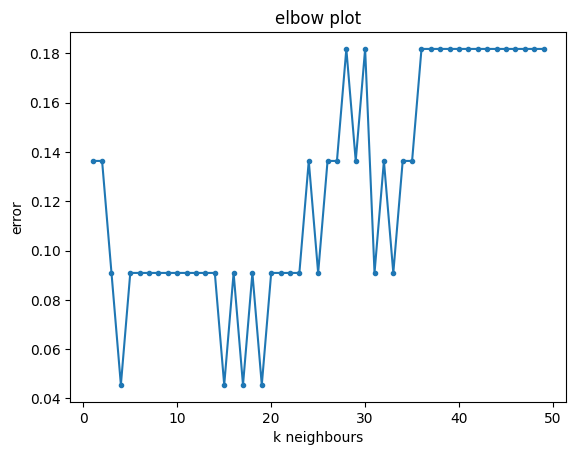

In [380]:
import matplotlib.pyplot as plt

error_list = []

for k in range(1, 50):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(scaled_X_train, y_train)
    y_pred = model.predict(scaled_X_val)
    error_list.append(1-accuracy_score(y_val, y_pred))

fig, ax = plt.figure(), plt.axes()
ax.plot(range(1, len(error_list)+1), error_list, ".-")
ax.set(title="elbow plot", xlabel="k neighbours", ylabel="error");

In [381]:
import numpy as np
# find k with lowest error
best_k = error_list.index(min(error_list)) + 1

# Merge X and y train and val
X_train_val = np.vstack([scaled_X_train, scaled_X_val])
y_train_val = np.hstack([y_train, y_val])

final_model = KNeighborsClassifier(n_neighbors=best_k)
final_model.fit(X_train_val, y_train_val)

X_train_val.shape

(124, 4)

In [382]:
y_pred = final_model.predict(scaled_X_test)

y_pred

array([1, 0, 1, 2, 0, 2, 0, 2, 1, 0, 0, 2, 0, 1, 2, 1, 2, 0, 0, 1, 0, 1])

In [383]:
y_test.values

array([1, 0, 1, 2, 0, 2, 0, 2, 1, 0, 0, 2, 0, 1, 2, 1, 2, 0, 0, 1, 0, 1])

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         6

    accuracy                           1.00        22
   macro avg       1.00      1.00      1.00        22
weighted avg       1.00      1.00      1.00        22



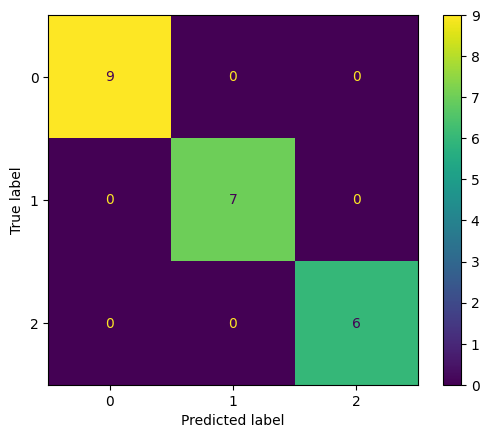

In [384]:
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot();

b) Use KNN to predict house prices for the dataset you used in exercise 1

In [385]:
df_house_price = pd.read_csv("../../data/house_price.csv")
df_house_price

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [386]:
df_house_price.describe().T.drop("count", axis=1)

,mean,std,min,25%,50%,75%,max
price,551962.988473,563834.702547,0.0,322875.00,460943.461539,654962.50,26590000.0
bedrooms,3.400870,0.908848,0.0,3.00,3.000000,4.00,9.0
bathrooms,2.160815,0.783781,0.0,1.75,2.250000,2.50,8.0
sqft_living,2139.346957,963.206916,370.0,1460.00,1980.000000,2620.00,13540.0
sqft_lot,14852.516087,35884.436145,638.0,5000.75,7683.000000,11001.25,1074218.0
floors,1.512065,0.538288,1.0,1.00,1.500000,2.00,3.5
waterfront,0.007174,0.084404,0.0,0.00,0.000000,0.00,1.0
view,0.240652,0.778405,0.0,0.00,0.000000,0.00,4.0
condition,3.451739,0.677230,1.0,3.00,3.000000,4.00,5.0
sqft_above,1827.265435,862.168977,370.0,1190.00,1590.000000,2300.00,9410.0


In [387]:
df_house_price = df_house_price.drop(["country", "statezip", "street", "date", "city"], axis="columns")
df_house_price

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005
1,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0
2,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0
3,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0
4,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979
4596,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009
4597,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0
4598,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0


In [388]:
df_house_price = df_house_price[df_house_price["price"] != 0].copy()
df_house_price.shape

(4551, 13)

In [389]:
df_house_price["yr_renovated"] = df_house_price.apply(lambda row: row["yr_built"] if row["yr_renovated"] == 0 else row["yr_renovated"], axis=1)
df_house_price.head(10)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005.0
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,1921.0
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,1966.0
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,1963.0
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992.0
5,490000.0,2.0,1.00,880,6380,1.0,0,0,3,880,0,1938,1994.0
6,335000.0,2.0,2.00,1350,2560,1.0,0,0,3,1350,0,1976,1976.0
7,482000.0,4.0,2.50,2710,35868,2.0,0,0,3,2710,0,1989,1989.0
8,452500.0,3.0,2.50,2430,88426,1.0,0,0,4,1570,860,1985,1985.0
9,640000.0,4.0,2.00,1520,6200,1.5,0,0,3,1520,0,1945,2010.0


In [390]:
X, y = df_house_price.drop("price", axis=1), df_house_price["price"]
X.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005.0
1,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,1921.0
2,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,1966.0
3,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,1963.0
4,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992.0


In [391]:
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42)

In [392]:
scaler.fit(X_train)

scaled_X_train = scaler.transform(X_train)
scaled_X_val = scaler.transform(X_val)
scaled_X_test = scaler.transform(X_test)

In [393]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
error_list = []

for k in range(1, 101):
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(scaled_X_train, y_train)
    y_pred = model.predict(scaled_X_val)
    error_list.append(mean_squared_error(y_val, y_pred))

In [394]:
# find k with lowest error
best_k = error_list.index(min(error_list)) + 1

# Merge X and y train and val
X_train_val = np.vstack([scaled_X_train, scaled_X_val])
y_train_val = np.hstack([y_train, y_val])

final_model = KNeighborsRegressor(n_neighbors=best_k)
final_model.fit(X_train_val, y_train_val)

y_pred = final_model.predict(scaled_X_test)

In [400]:
metrics_dict = {
    "MAE": mean_absolute_error(y_test, y_pred),
    "MSE": mean_squared_error(y_test, y_pred),
    "RMSE": np.sqrt(mean_squared_error(y_test, y_pred))
}

metrics_df = pd.DataFrame(metrics_dict, index=[0])
print(metrics_df)

             MAE           MSE           RMSE
0  159005.977581  5.821015e+10  241267.788068
